In [13]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import datetime
import time
import json
import spotipy

client_id = "9ab504ff3c144d03924e45bd7cae5168"
client_secret = "SECRET"

from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [11]:
# merge viral 50 for January
files = glob.glob('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/jan/*.csv')
jan_viral_50 = pd.concat([pd.read_csv(fp).assign(Filename=os.path.basename(fp)) for fp in files])


jan_viral_50['Month']=''
jan_viral_50['Week Number']=''
jan_viral_50['Type']=''

# Extract Date from Filename using slice
jan_viral_50['Date'] = jan_viral_50['Filename'].str.slice(16,26)

# Convert to datetime
jan_viral_50['Date'] = pd.to_datetime(jan_viral_50['Date'])

# Get Week Number from Date
jan_viral_50['Week Number'] = jan_viral_50['Date'].dt.isocalendar().week

for index, row in jan_viral_50.iterrows():
    jan_viral_50.loc[index, 'Month'] = 'January'
    jan_viral_50.loc[index, 'Type'] = 'Viral 50'

jan_viral_50.to_csv('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/jan/jan_viral_50.csv')

jan_viral_50.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09


In [14]:
# create columns for Spotify data
jan_viral_50['Artist ID'] = ''
jan_viral_50['Genre 1'] = ''
jan_viral_50['Genre 2'] = ''
jan_viral_50['Genre 3'] = ''

# create list to collect artist ID
artist_id = []

# loop to go through dataframe and pull artist ID
for index, row in jan_viral_50.iterrows():
    track_id = row['URL']
    track_features = sp.track(track_id)
    jan_viral_50.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']
    time.sleep(1.01)

# loop to go through dataframe and pull genres
for index, row in jan_viral_50.iterrows():
    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        jan_viral_50.loc[index, 'Genre 1'] = artist_features['genres'][0]
        jan_viral_50.loc[index, 'Genre 2'] = artist_features['genres'][1]
        jan_viral_50.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'No genre found...skipping.')
    time.sleep(1.01)

jan_viral_50.head()

No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
N

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,4Ywiqc8KxAECFoOWWAYry4,,,
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,,
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap


In [55]:
jan_genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('rap|hip hop|trap') | jan_viral_50['Genre 2'].str.contains('rap|hip hop|trap') | jan_viral_50['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('r&b|soul|blues') | jan_viral_50['Genre 2'].str.contains('r&b|soul|blues') | jan_viral_50['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('pop') | jan_viral_50['Genre 2'].str.contains('pop') | jan_viral_50['Genre 3'].str.contains('pop')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('rock') | jan_viral_50['Genre 2'].str.contains('rock') | jan_viral_50['Genre 3'].str.contains('rock')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('country') | jan_viral_50['Genre 2'].str.contains('country') | jan_viral_50['Genre 3'].str.contains('country')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('latin') | jan_viral_50['Genre 2'].str.contains('latin') | jan_viral_50['Genre 3'].str.contains('latin')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('disco') | jan_viral_50['Genre 2'].str.contains('disco') | jan_viral_50['Genre 3'].str.contains('disco')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('indie') | jan_viral_50['Genre 2'].str.contains('indie') | jan_viral_50['Genre 3'].str.contains('indie')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('house|edm') | jan_viral_50['Genre 2'].str.contains('house|edm') | jan_viral_50['Genre 3'].str.contains('house|edm')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('alt|alternative') | jan_viral_50['Genre 2'].str.contains('alt|alternative') | jan_viral_50['Genre 3'].str.contains('alt|alternative')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('glitchcore') | jan_viral_50['Genre 2'].str.contains('glitchcore') | jan_viral_50['Genre 3'].str.contains('glitchcore')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('brooklyn drill') | jan_viral_50['Genre 2'].str.contains('brooklyn drill') | jan_viral_50['Genre 3'].str.contains('brooklyn drill')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('halloween') | jan_viral_50['Genre 2'].str.contains('halloween') | jan_viral_50['Genre 3'].str.contains('halloween')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('christmas') | jan_viral_50['Genre 2'].str.contains('christmas') | jan_viral_50['Genre 3'].str.contains('christmas')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('classical') | jan_viral_50['Genre 2'].str.contains('classical') | jan_viral_50['Genre 3'].str.contains('classical')])]
}

jan_genre_df = pd.DataFrame(jan_genre_data)
jan_genre_df

,Genre,Count
0,Rap/Hip Hop/Trap,80
1,R&B/Soul/Blues,20
2,Pop,112
3,Rock,4
4,Country,12
5,Latin,8
6,Disco,0
7,Indie,12
8,House/EDM,8
9,Alternative/Alt,32


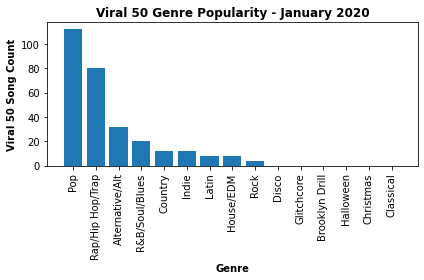

In [84]:
jan_genre_df_sort = jan_genre_df.sort_values('Count', ascending=False)

x = jan_genre_df_sort['Genre']
y = jan_genre_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.title('Viral 50 Genre Popularity - January 2020', weight='bold')
plt.tight_layout()
plt.show()

In [15]:
# top 200 slicing is (19,29)

# merge viral 50 for March
files = glob.glob('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/mar/*.csv')
mar_viral_50 = pd.concat([pd.read_csv(fp).assign(Filename=os.path.basename(fp)) for fp in files])

mar_viral_50['Month']=''
mar_viral_50['Week Number']=''
mar_viral_50['Type']=''

# Extract Date from Filename using slice
mar_viral_50['Date'] = mar_viral_50['Filename'].str.slice(16,26)

# Convert to datetime
mar_viral_50['Date'] = pd.to_datetime(mar_viral_50['Date'])

# Get Week Number from Date
mar_viral_50['Week Number'] = mar_viral_50['Date'].dt.isocalendar().week

for index, row in mar_viral_50.iterrows():
    mar_viral_50.loc[index, 'Month'] = 'March'
    mar_viral_50.loc[index, 'Type'] = 'Viral 50'

mar_viral_50.to_csv('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/mar/mar_viral_50.csv')

mar_viral_50.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date
0,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
2,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
3,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
4,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26


In [16]:
# create columns for Spotify data
mar_viral_50['Artist ID'] = ''
mar_viral_50['Genre 1'] = ''
mar_viral_50['Genre 2'] = ''
mar_viral_50['Genre 3'] = ''

# create list to collect artist ID
artist_id = []

# loop to go through dataframe and pull artist ID
for index, row in mar_viral_50.iterrows():
    track_id = row['URL']
    track_features = sp.track(track_id)
    mar_viral_50.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']
    time.sleep(1.01)

# loop to go through dataframe and pull genres
for index, row in mar_viral_50.iterrows():
    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        mar_viral_50.loc[index, 'Genre 1'] = artist_features['genres'][0]
        mar_viral_50.loc[index, 'Genre 2'] = artist_features['genres'][1]
        mar_viral_50.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'No genre found...skipping.')
    time.sleep(1.01)

mar_viral_50.head()

No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
N

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,3O5HD95HTEPgoPFOjAb7yV,viral rap,,
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,6bmlMHgSheBauioMgKv2tn,emo rap,sad rap,
2,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
3,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,0DbBBj0ScPumRqKXswGQH1,viral rap,,
4,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,0Cp8WN4V8Tu4QJQwCN5Md4,alt z,nz pop,pop


In [65]:
mar_genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('rap|hip hop|trap') | mar_viral_50['Genre 2'].str.contains('rap|hip hop|trap') | mar_viral_50['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('r&b|soul|blues') | mar_viral_50['Genre 2'].str.contains('r&b|soul|blues') | mar_viral_50['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('pop') | mar_viral_50['Genre 2'].str.contains('pop') | mar_viral_50['Genre 3'].str.contains('pop')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('rock') | mar_viral_50['Genre 2'].str.contains('rock') | mar_viral_50['Genre 3'].str.contains('rock')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('country') | mar_viral_50['Genre 2'].str.contains('country') | mar_viral_50['Genre 3'].str.contains('country')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('latin') | mar_viral_50['Genre 2'].str.contains('latin') | mar_viral_50['Genre 3'].str.contains('latin')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('disco') | mar_viral_50['Genre 2'].str.contains('disco') | mar_viral_50['Genre 3'].str.contains('disco')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('indie') | mar_viral_50['Genre 2'].str.contains('indie') | mar_viral_50['Genre 3'].str.contains('indie')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('house|edm') | mar_viral_50['Genre 2'].str.contains('house|edm') | mar_viral_50['Genre 3'].str.contains('house|edm')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('alt|alternative') | mar_viral_50['Genre 2'].str.contains('alt|alternative') | mar_viral_50['Genre 3'].str.contains('alt|alternative')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('glitchcore') | mar_viral_50['Genre 2'].str.contains('glitchcore') | mar_viral_50['Genre 3'].str.contains('glitchcore')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('brooklyn drill') | mar_viral_50['Genre 2'].str.contains('brooklyn drill') | mar_viral_50['Genre 3'].str.contains('brooklyn drill')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('halloween') | mar_viral_50['Genre 2'].str.contains('halloween') | mar_viral_50['Genre 3'].str.contains('halloween')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('christmas') | mar_viral_50['Genre 2'].str.contains('christmas') | mar_viral_50['Genre 3'].str.contains('christmas')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('classical') | mar_viral_50['Genre 2'].str.contains('classical') | mar_viral_50['Genre 3'].str.contains('classical')])]
}

mar_genre_df = pd.DataFrame(mar_genre_data)
mar_genre_df

,Genre,Count
0,Rap/Hip Hop/Trap,100
1,R&B/Soul/Blues,32
2,Pop,72
3,Rock,4
4,Country,8
5,Latin,8
6,Disco,0
7,Indie,12
8,House/EDM,12
9,Alternative/Alt,28


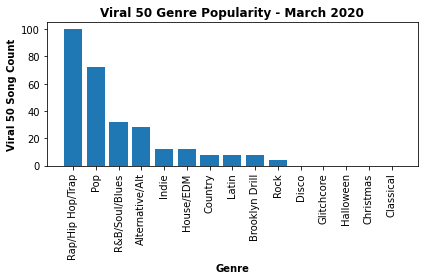

In [91]:
mar_genre_df_sort = mar_genre_df.sort_values('Count', ascending=False)

x = mar_genre_df_sort['Genre']
y = mar_genre_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.title('Viral 50 Genre Popularity - March 2020', weight='bold')
plt.tight_layout()
plt.show()

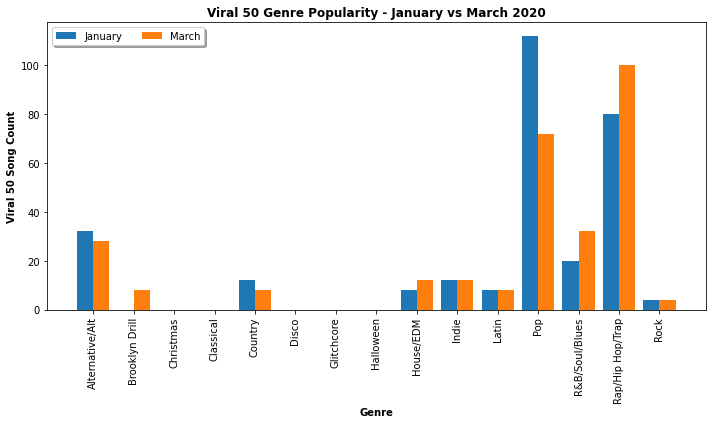

In [109]:
jan_genre_df_alpha = jan_genre_df.sort_values('Genre')
mar_genre_df_alpha = mar_genre_df.sort_values('Genre')

fix, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(jan_genre_df_alpha['Genre'].unique()))

bar_width = 0.4

b1 = ax.bar(x, jan_genre_df_alpha['Count'], width=bar_width, label='January')
b2 = ax.bar(x + bar_width, mar_genre_df_alpha['Count'], width=bar_width, label='March')


ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(jan_genre_df_alpha['Genre'], rotation=90)


ax.legend(loc='upper left', shadow=True, ncol=2)

plt.title('Viral 50 Genre Popularity - January vs March 2020', weight='bold')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.tight_layout()
plt.show()